# 🏡 Zurich Real Estate Price Prediction
## Exploratory Data Analysis (EDA)

Diese Notebook untersucht die Zürich Immobilienpreis-Datensätze und bereitet sie für die Modellierung vor.

In [3]:
# Benötigte Bibliotheken importieren
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Anzeigeoptionen konfigurieren
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

# Plot-Stil festlegen
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')
plt.rcParams['figure.figsize'] = (12, 8)

## 1. Daten laden

Wir laden die zwei Hauptdatensätze:
- `bau515od5155.csv`: Immobilienpreise nach Quartier
- `bau515od5156.csv`: Immobilienpreise nach Baualter

In [4]:
# Datensätze laden
df_quartier = pd.read_csv('https://raw.githubusercontent.com/Rinor909/zurich-real-estate/refs/heads/main/data/raw/bau515od5155.csv')
df_baualter = pd.read_csv('https://raw.githubusercontent.com/Rinor909/zurich-real-estate/refs/heads/main/data/raw/bau515od5156.csv')

print(f"Quartier-Datensatz: {df_quartier.shape[0]} Zeilen, {df_quartier.shape[1]} Spalten")
print(f"Baualter-Datensatz: {df_baualter.shape[0]} Zeilen, {df_baualter.shape[1]} Spalten")

Quartier-Datensatz: 4512 Zeilen, 18 Spalten
Baualter-Datensatz: 550 Zeilen, 18 Spalten


## 2. Datenübersicht

Zunächst verschaffen wir uns einen Überblick über die Struktur der Datensätze.

In [5]:
# Quartier-Datensatz untersuchen
print("Quartier-Datensatz - Kopf:")
display(df_quartier.head())

print("\nQuartier-Datensatz - Info:")
df_quartier.info()

Quartier-Datensatz - Kopf:


,Stichtagdatjahr,DatenstandCd,HAArtLevel1Sort,HAArtLevel1Cd,HAArtLevel1Lang,HASTWESort,HASTWECd,HASTWELang,RaumSort,RaumCd,RaumLang,AnzZimmerLevel2Sort_noDM,AnzZimmerLevel2Cd_noDM,AnzZimmerLevel2Lang_noDM,AnzHA,HAPreisWohnflaeche,HAMedianPreis,HASumPreis
0,2009,D,1,22,Kauf,1,J,Ja,0,0,Ganze Stadt,1,1,1-Zimmer,31,8552.00,265000.00,11965926
1,2009,D,1,22,Kauf,1,J,Ja,0,0,Ganze Stadt,2,2,2-Zimmer,89,7800.00,505000.00,54240051
2,2009,D,1,22,Kauf,1,J,Ja,0,0,Ganze Stadt,3,3,3-Zimmer,143,7389.00,698550.00,116057305
3,2009,D,1,22,Kauf,1,J,Ja,0,0,Ganze Stadt,4,4,4-Zimmer,208,7577.00,855750.00,203086012
4,2009,D,1,22,Kauf,1,J,Ja,0,0,Ganze Stadt,5,5,5-Zimmer,83,9117.00,1312500.00,113148986



Quartier-Datensatz - Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4512 entries, 0 to 4511
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Stichtagdatjahr           4512 non-null   int64  
 1   DatenstandCd              4512 non-null   object 
 2   HAArtLevel1Sort           4512 non-null   int64  
 3   HAArtLevel1Cd             4512 non-null   int64  
 4   HAArtLevel1Lang           4512 non-null   object 
 5   HASTWESort                4512 non-null   int64  
 6   HASTWECd                  4512 non-null   object 
 7   HASTWELang                4512 non-null   object 
 8   RaumSort                  4512 non-null   int64  
 9   RaumCd                    4512 non-null   int64  
 10  RaumLang                  4512 non-null   object 
 11  AnzZimmerLevel2Sort_noDM  4512 non-null   int64  
 12  AnzZimmerLevel2Cd_noDM    4512 non-null   int64  
 13  AnzZimmerLevel2Lang_noDM  4512 non-

In [6]:
# Baualter-Datensatz untersuchen
print("Baualter-Datensatz - Kopf:")
display(df_baualter.head())

print("\nBaualter-Datensatz - Info:")
df_baualter.info()

Baualter-Datensatz - Kopf:


,Stichtagdatjahr,DatenstandCd,HAArtLevel1Sort,HAArtLevel1Cd,HAArtLevel1Lang,HASTWESort,HASTWECd,HASTWELang,BaualterSort_noDM,BaualterCd_noDM,BaualterLang_noDM,AnzZimmerLevel2Sort_noDM,AnzZimmerLevel2Cd_noDM,AnzZimmerLevel2Lang_noDM,AnzHA,HAPreisWohnflaeche,HAMedianPreis,HASumPreis
0,2009,D,1,22,Kauf,1,J,Ja,1,1,Neubauten (0–1 Jahre),1,1,1-Zimmer,1–3,6818,375000,K
1,2009,D,1,22,Kauf,1,J,Ja,2,2,2–9 Jahre,1,1,1-Zimmer,1–3,17618,926090,K
2,2009,D,1,22,Kauf,1,J,Ja,3,3,10–19 Jahre,1,1,1-Zimmer,1–3,8361,371180,K
3,2009,D,1,22,Kauf,1,J,Ja,4,4,Altbauten (umgebaut),1,1,1-Zimmer,1–3,9389,213060,K
4,2009,D,1,22,Kauf,1,J,Ja,5,5,Altbauten (nicht umgebaut),1,1,1-Zimmer,24,8500,264100,8570281



Baualter-Datensatz - Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Stichtagdatjahr           550 non-null    int64 
 1   DatenstandCd              550 non-null    object
 2   HAArtLevel1Sort           550 non-null    int64 
 3   HAArtLevel1Cd             550 non-null    int64 
 4   HAArtLevel1Lang           550 non-null    object
 5   HASTWESort                550 non-null    int64 
 6   HASTWECd                  550 non-null    object
 7   HASTWELang                550 non-null    object
 8   BaualterSort_noDM         550 non-null    int64 
 9   BaualterCd_noDM           550 non-null    int64 
 10  BaualterLang_noDM         550 non-null    object
 11  AnzZimmerLevel2Sort_noDM  550 non-null    int64 
 12  AnzZimmerLevel2Cd_noDM    550 non-null    int64 
 13  AnzZimmerLevel2Lang_noDM  550 non-null    object
 14

In [7]:
# Statistische Zusammenfassung
print("Quartier-Datensatz - Statistik:")
display(df_quartier.describe())

print("\nBaualter-Datensatz - Statistik:")
display(df_baualter.describe())

Quartier-Datensatz - Statistik:


,Stichtagdatjahr,HAArtLevel1Sort,HAArtLevel1Cd,HASTWESort,RaumSort,RaumCd,AnzZimmerLevel2Sort_noDM,AnzZimmerLevel2Cd_noDM,HAPreisWohnflaeche,HAMedianPreis
count,4512.00,4512.00,4512.00,4512.00,4512.00,4512.00,4512.00,4512.00,3005.00,3005.00
mean,2016.50,1.00,22.00,1.00,63.47,48.53,3.50,3.50,12831.24,1378458.50
std,4.61,0.00,0.00,0.00,36.43,40.38,1.71,1.71,5173.45,915656.09
min,2009.00,1.00,22.00,1.00,0.00,0.00,1.00,1.00,145.00,4210.00
25%,2012.75,1.00,22.00,1.00,31.00,11.00,2.00,2.00,9460.00,740000.00
50%,2016.50,1.00,22.00,1.00,63.00,41.00,3.50,3.50,12151.00,1187530.00
75%,2020.25,1.00,22.00,1.00,92.00,82.00,5.00,5.00,15517.00,1775000.00
max,2024.00,1.00,22.00,1.00,123.00,123.00,6.00,6.00,93000.00,7250000.00



Baualter-Datensatz - Statistik:


,Stichtagdatjahr,HAArtLevel1Sort,HAArtLevel1Cd,HASTWESort,BaualterSort_noDM,BaualterCd_noDM,AnzZimmerLevel2Sort_noDM,AnzZimmerLevel2Cd_noDM,HAPreisWohnflaeche,HAMedianPreis
count,550.00,550.00,550.00,550.00,550.00,550.00,550.00,550.00,550.00,550.00
mean,2016.49,1.00,22.00,1.00,4.07,4.07,3.50,3.50,12706.16,1496751.58
std,4.64,0.00,0.00,0.00,2.62,2.62,1.66,1.66,3504.47,934761.75
min,2009.00,1.00,22.00,1.00,1.00,1.00,1.00,1.00,4415.00,130000.00
25%,2012.00,1.00,22.00,1.00,2.00,2.00,2.00,2.00,10256.50,850000.00
50%,2016.50,1.00,22.00,1.00,4.00,4.00,3.50,3.50,12280.00,1347500.00
75%,2020.00,1.00,22.00,1.00,5.00,5.00,5.00,5.00,15105.00,1848750.00
max,2024.00,1.00,22.00,1.00,9.00,9.00,6.00,6.00,28302.00,6725000.00


## 3. Datenbereinigung

Wir reduzieren die Datensätze auf die relevanten Spalten und bereinigen sie.

In [8]:
# Relevante Spalten auswählen - Quartier-Datensatz
quartier_spalten = {
    'Stichtagdatjahr': 'Jahr',              # Jahr der Datenerhebung
    'RaumLang': 'Quartier',                 # Name des Stadtquartiers 
    'AnzZimmerLevel2Lang_noDM': 'Zimmeranzahl',  # Zimmeranzahl als Text
    'HAMedianPreis': 'MedianPreis',         # Median-Verkaufspreis
    'HAPreisWohnflaeche': 'PreisProQm'      # Preis pro Quadratmeter
}

df_quartier_clean = df_quartier[quartier_spalten.keys()].copy()
df_quartier_clean.rename(columns=quartier_spalten, inplace=True)

# Relevante Spalten auswählen - Baualter-Datensatz
baualter_spalten = {
    'Stichtagdatjahr': 'Jahr',              # Jahr der Datenerhebung
    'BaualterLang_noDM': 'Baualter',        # Baualtersklasse als Text
    'AnzZimmerLevel2Lang_noDM': 'Zimmeranzahl',  # Zimmeranzahl als Text
    'HAMedianPreis': 'MedianPreis',         # Median-Verkaufspreis
    'HAPreisWohnflaeche': 'PreisProQm'      # Preis pro Quadratmeter
}

df_baualter_clean = df_baualter[baualter_spalten.keys()].copy()
df_baualter_clean.rename(columns=baualter_spalten, inplace=True)

# Bereinigte Datensätze anzeigen
print("Bereinigter Quartier-Datensatz:")
display(df_quartier_clean.head())

print("\nBereinigter Baualter-Datensatz:")
display(df_baualter_clean.head())

Bereinigter Quartier-Datensatz:


,Jahr,Quartier,Zimmeranzahl,MedianPreis,PreisProQm
0,2009,Ganze Stadt,1-Zimmer,265000.00,8552.00
1,2009,Ganze Stadt,2-Zimmer,505000.00,7800.00
2,2009,Ganze Stadt,3-Zimmer,698550.00,7389.00
3,2009,Ganze Stadt,4-Zimmer,855750.00,7577.00
4,2009,Ganze Stadt,5-Zimmer,1312500.00,9117.00



Bereinigter Baualter-Datensatz:


,Jahr,Baualter,Zimmeranzahl,MedianPreis,PreisProQm
0,2009,Neubauten (0–1 Jahre),1-Zimmer,375000,6818
1,2009,2–9 Jahre,1-Zimmer,926090,17618
2,2009,10–19 Jahre,1-Zimmer,371180,8361
3,2009,Altbauten (umgebaut),1-Zimmer,213060,9389
4,2009,Altbauten (nicht umgebaut),1-Zimmer,264100,8500


In [9]:
# Fehlende Werte überprüfen
print("Fehlende Werte im Quartier-Datensatz:")
display(df_quartier_clean.isnull().sum())

print("\nFehlende Werte im Baualter-Datensatz:")
display(df_baualter_clean.isnull().sum())

Fehlende Werte im Quartier-Datensatz:


Jahr               0
Quartier           0
Zimmeranzahl       0
MedianPreis     1507
PreisProQm      1507
dtype: int64


Fehlende Werte im Baualter-Datensatz:


Jahr            0
Baualter        0
Zimmeranzahl    0
MedianPreis     0
PreisProQm      0
dtype: int64

## 4. Feature-Engineering

Wir extrahieren und transformieren Features aus den Textfeldern.

In [10]:
# Zimmeranzahl von Text (z.B. "2-Zimmer") zu Zahl (2) konvertieren
def zimmer_zu_int(zimmer_str):
    """Extrahiert die Zimmeranzahl aus dem String-Format"""
    try:
        return int(zimmer_str.split('-')[0])
    except:
        return np.nan

df_quartier_clean['Zimmeranzahl_num'] = df_quartier_clean['Zimmeranzahl'].apply(zimmer_zu_int)
df_baualter_clean['Zimmeranzahl_num'] = df_baualter_clean['Zimmeranzahl'].apply(zimmer_zu_int)

# Baualter in numerisches Format umwandeln
def baualter_zu_jahr(baualter_str):
    """Wandelt Baualter-Text in ungefähres Baujahr um"""
    try:
        # Format "1981-2000"
        if '-' in baualter_str:
            jahre = baualter_str.split('-')
            return (int(jahre[0]) + int(jahre[1])) / 2
        # Format "vor 1919"
        elif 'vor' in baualter_str:
            return 1919
        # Format "nach 2015" oder "seit 2015"
        elif 'nach' in baualter_str or 'seit' in baualter_str:
            return 2015
        else:
            return np.nan
    except:
        return np.nan

df_baualter_clean['Baujahr'] = df_baualter_clean['Baualter'].apply(baualter_zu_jahr)

# Transformierte Daten anzeigen
print("Quartier-Datensatz mit numerischer Zimmeranzahl:")
display(df_quartier_clean.head())

print("\nBaualter-Datensatz mit numerischer Zimmeranzahl und Baujahr:")
display(df_baualter_clean.head())

Quartier-Datensatz mit numerischer Zimmeranzahl:


,Jahr,Quartier,Zimmeranzahl,MedianPreis,PreisProQm,Zimmeranzahl_num
0,2009,Ganze Stadt,1-Zimmer,265000.00,8552.00,1
1,2009,Ganze Stadt,2-Zimmer,505000.00,7800.00,2
2,2009,Ganze Stadt,3-Zimmer,698550.00,7389.00,3
3,2009,Ganze Stadt,4-Zimmer,855750.00,7577.00,4
4,2009,Ganze Stadt,5-Zimmer,1312500.00,9117.00,5



Baualter-Datensatz mit numerischer Zimmeranzahl und Baujahr:


,Jahr,Baualter,Zimmeranzahl,MedianPreis,PreisProQm,Zimmeranzahl_num,Baujahr
0,2009,Neubauten (0–1 Jahre),1-Zimmer,375000,6818,1,NaN
1,2009,2–9 Jahre,1-Zimmer,926090,17618,1,NaN
2,2009,10–19 Jahre,1-Zimmer,371180,8361,1,NaN
3,2009,Altbauten (umgebaut),1-Zimmer,213060,9389,1,NaN
4,2009,Altbauten (nicht umgebaut),1-Zimmer,264100,8500,1,NaN


## 5. Explorative Datenanalyse

Wir untersuchen die Verteilungen und Beziehungen in den Daten.

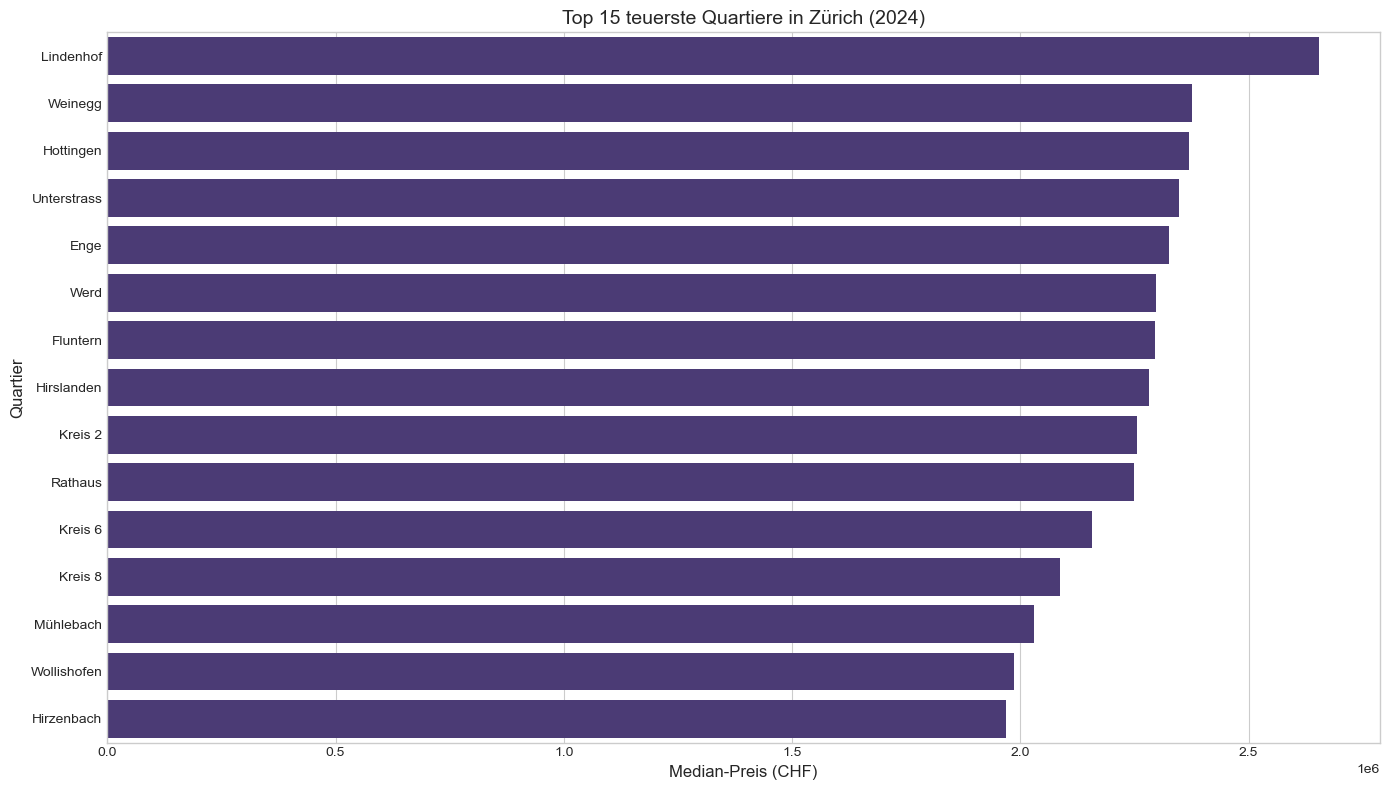

In [11]:
# Verteilung der Immobilienpreise nach Quartier
plt.figure(figsize=(14, 8))
latest_year = df_quartier_clean['Jahr'].max()
df_latest = df_quartier_clean[df_quartier_clean['Jahr'] == latest_year]

# Nach Quartier gruppieren und Median-Preis berechnen
df_quartier_grouped = df_latest.groupby('Quartier')['MedianPreis'].median().sort_values(ascending=False).reset_index()

# Top 15 teuerste Quartiere visualisieren
top_15 = df_quartier_grouped.head(15)
sns.barplot(x='MedianPreis', y='Quartier', data=top_15)
plt.title(f'Top 15 teuerste Quartiere in Zürich ({latest_year})', fontsize=14)
plt.xlabel('Median-Preis (CHF)', fontsize=12)
plt.ylabel('Quartier', fontsize=12)
plt.tight_layout()
plt.show()

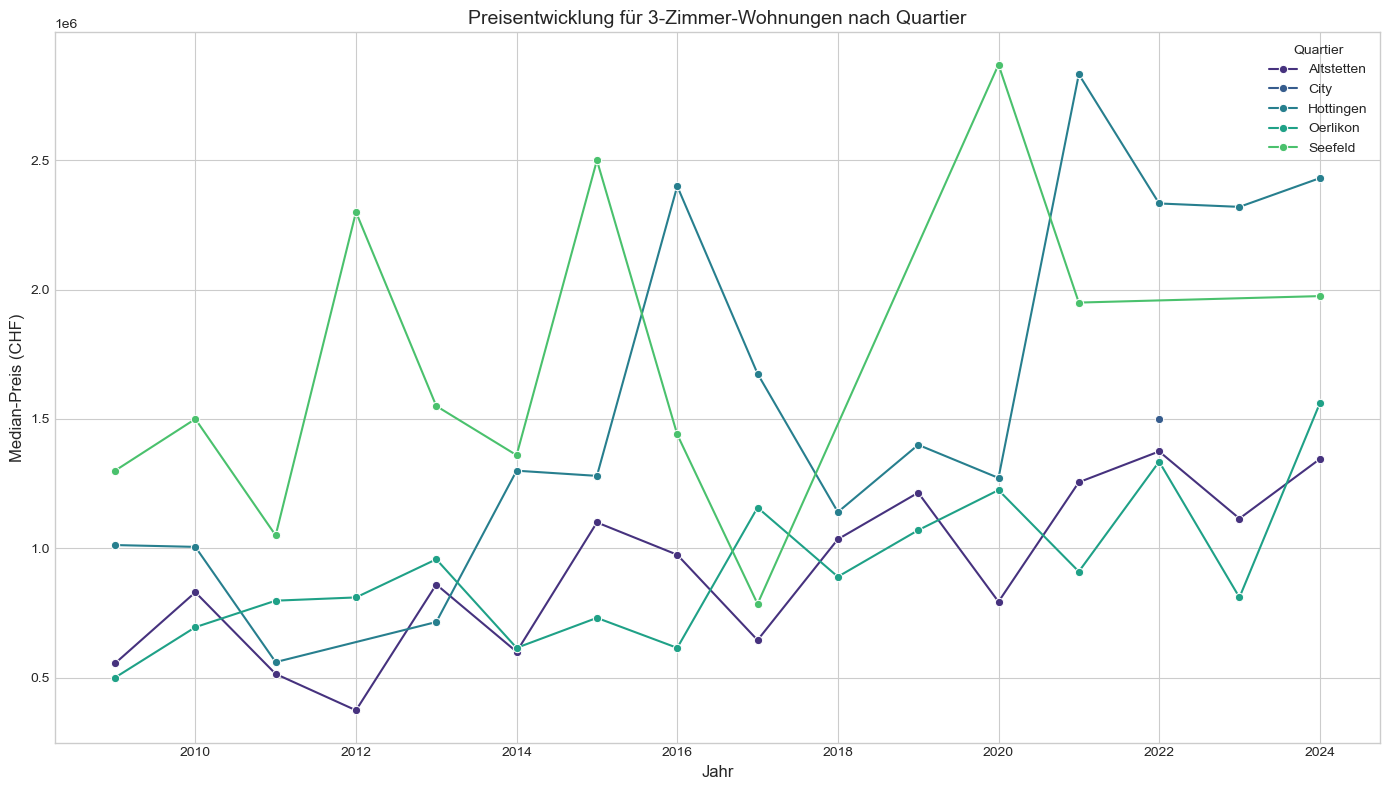

In [12]:
# Preisentwicklung über die Zeit für ausgewählte Quartiere
plt.figure(figsize=(14, 8))

# Einige repräsentative Quartiere auswählen
selected_quartiere = ['Hottingen', 'City', 'Seefeld', 'Oerlikon', 'Altstetten']

# Daten für ausgewählte Quartiere und 3-Zimmer-Wohnungen filtern
df_selected = df_quartier_clean[
    (df_quartier_clean['Quartier'].isin(selected_quartiere)) & 
    (df_quartier_clean['Zimmeranzahl_num'] == 3)
]

# Nach Jahr und Quartier gruppieren und Median-Preis berechnen
df_trend = df_selected.groupby(['Jahr', 'Quartier'])['MedianPreis'].median().reset_index()

# Liniendiagramm für Preisentwicklung
sns.lineplot(x='Jahr', y='MedianPreis', hue='Quartier', data=df_trend, marker='o')
plt.title('Preisentwicklung für 3-Zimmer-Wohnungen nach Quartier', fontsize=14)
plt.xlabel('Jahr', fontsize=12)
plt.ylabel('Median-Preis (CHF)', fontsize=12)
plt.grid(True)
plt.legend(title='Quartier')
plt.tight_layout()
plt.show()

C:\Users\rinor\AppData\Local\Temp\ipykernel_12464\2912719402.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Zimmer')


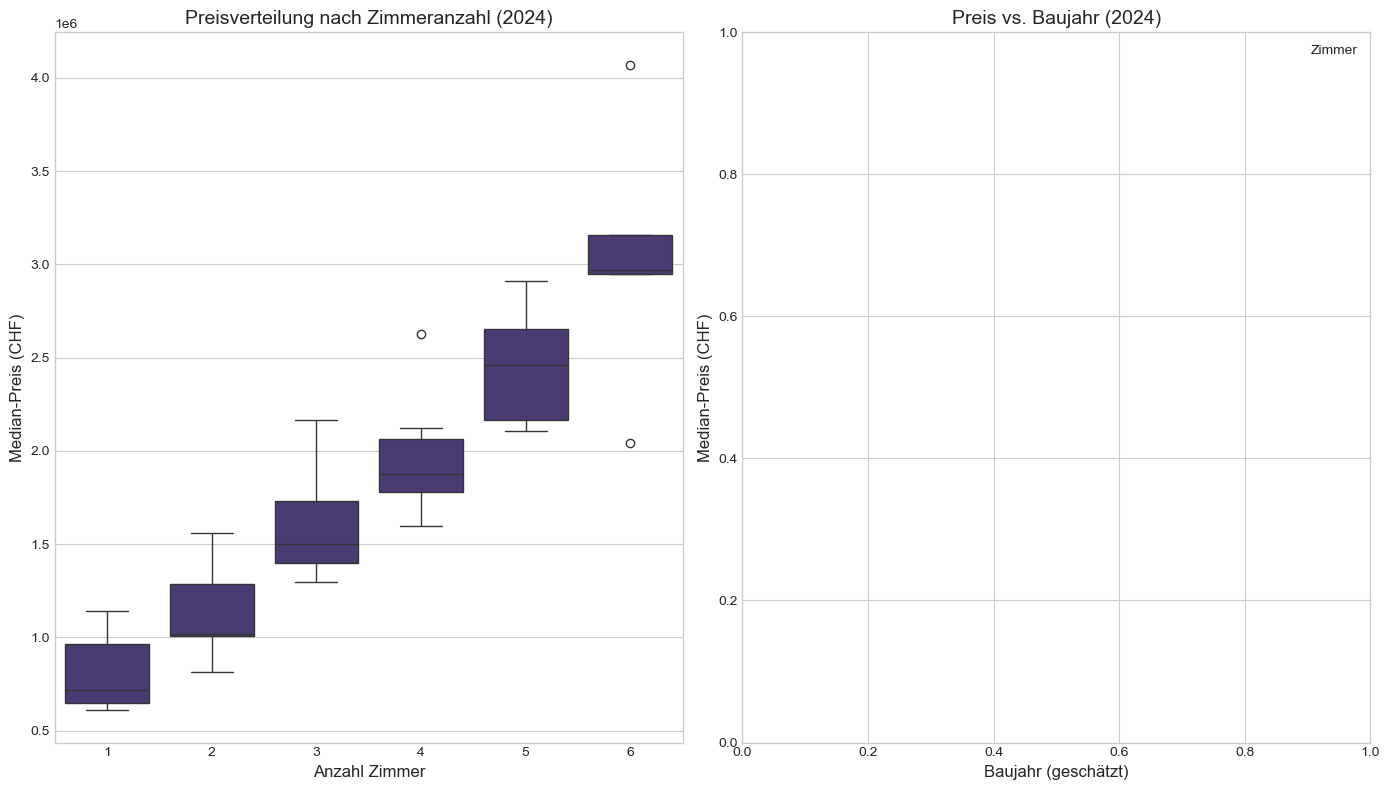

In [13]:
# Preis nach Zimmeranzahl und Baualter
plt.figure(figsize=(14, 8))

# Neueste Daten filtern
df_baualter_latest = df_baualter_clean[df_baualter_clean['Jahr'] == latest_year]

# Boxplot für Preis nach Zimmeranzahl
plt.subplot(1, 2, 1)
sns.boxplot(x='Zimmeranzahl_num', y='MedianPreis', data=df_baualter_latest)
plt.title(f'Preisverteilung nach Zimmeranzahl ({latest_year})', fontsize=14)
plt.xlabel('Anzahl Zimmer', fontsize=12)
plt.ylabel('Median-Preis (CHF)', fontsize=12)

# Streudiagramm für Preis vs. Baujahr
plt.subplot(1, 2, 2)
sns.scatterplot(x='Baujahr', y='MedianPreis', hue='Zimmeranzahl_num', data=df_baualter_latest)
plt.title(f'Preis vs. Baujahr ({latest_year})', fontsize=14)
plt.xlabel('Baujahr (geschätzt)', fontsize=12)
plt.ylabel('Median-Preis (CHF)', fontsize=12)
plt.legend(title='Zimmer')

plt.tight_layout()
plt.show()

## 6. Datensätze zusammenführen

Wir kombinieren die Informationen aus beiden Datensätzen für die Modellierung.

In [14]:
# Aggregieren der Baualter-Daten nach Jahr und Zimmeranzahl
df_baualter_agg = df_baualter_clean.groupby(['Jahr', 'Zimmeranzahl_num']).agg({
    'MedianPreis': 'mean',
    'Baujahr': 'mean'
}).reset_index()

df_baualter_agg.rename(columns={
    'MedianPreis': 'MedianPreis_Baualter',
    'Baujahr': 'Durchschnitt_Baujahr'
}, inplace=True)

# Die aggregierten Baualter-Daten mit dem Quartier-Datensatz verbinden
df_merged = pd.merge(
    df_quartier_clean,
    df_baualter_agg,
    on=['Jahr', 'Zimmeranzahl_num'],
    how='left'
)

# Preisverhältnis berechnen: Quartierpreis zu durchschnittlichem Preis nach Baualter
df_merged['Preis_Verhältnis'] = df_merged['MedianPreis'] / df_merged['MedianPreis_Baualter']

# Zusammengeführten Datensatz anzeigen
display(df_merged.head())

,Jahr,Quartier,Zimmeranzahl,MedianPreis,PreisProQm,Zimmeranzahl_num,MedianPreis_Baualter,Durchschnitt_Baujahr,Preis_Verhältnis
0,2009,Ganze Stadt,1-Zimmer,265000.00,8552.00,1,402405.00,NaN,0.66
1,2009,Ganze Stadt,2-Zimmer,505000.00,7800.00,2,630606.67,NaN,0.80
2,2009,Ganze Stadt,3-Zimmer,698550.00,7389.00,3,737008.33,NaN,0.95
3,2009,Ganze Stadt,4-Zimmer,855750.00,7577.00,4,962625.00,NaN,0.89
4,2009,Ganze Stadt,5-Zimmer,1312500.00,9117.00,5,1603848.33,NaN,0.82


## 7. Quartier-Preisniveau berechnen

Wir berechnen ein relatives Preisniveau für jedes Quartier.

In [15]:
# Neustes Jahr für das finale Modelltraining wählen
neuestes_jahr = df_merged['Jahr'].max()
df_final = df_merged[df_merged['Jahr'] == neuestes_jahr].copy()

# Feature für Quartier-Preisniveau: Durchschnittlicher Preis im Quartier relativ zum Gesamtdurchschnitt
quartier_avg_preis = df_final.groupby('Quartier')['MedianPreis'].mean()
gesamtpreis_avg = quartier_avg_preis.mean()
quartier_preisniveau = (quartier_avg_preis / gesamtpreis_avg).to_dict()

df_final['Quartier_Preisniveau'] = df_final['Quartier'].map(quartier_preisniveau)

# Preisniveau-Ranking anzeigen
quartier_ranking = pd.DataFrame({
    'Quartier': quartier_preisniveau.keys(),
    'Preisniveau': quartier_preisniveau.values()
}).sort_values('Preisniveau', ascending=False).reset_index(drop=True)

display(quartier_ranking.head(10))

,Quartier,Preisniveau
0,Kreis 2,1.57
1,Enge,1.55
2,Lindenhof,1.48
3,Hirslanden,1.33
4,Kreis 8,1.32
5,Hottingen,1.31
6,Mühlebach,1.29
7,Weinegg,1.29
8,Werd,1.28
9,Fluntern,1.28


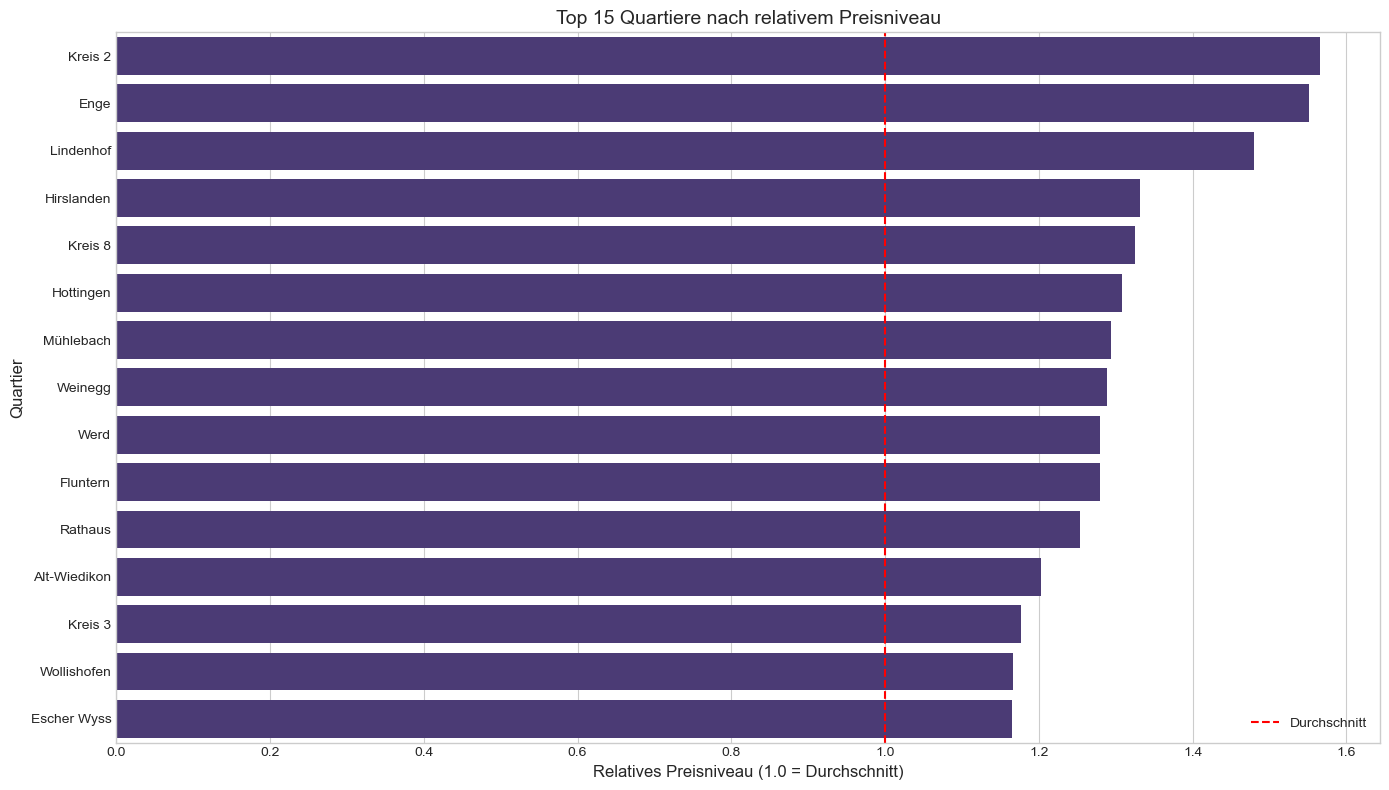

In [16]:
# Visualisierung des Preisniveaus nach Quartier
plt.figure(figsize=(14, 8))

# Top 15 Quartiere nach Preisniveau
top_15_preisniveau = quartier_ranking.head(15)
sns.barplot(x='Preisniveau', y='Quartier', data=top_15_preisniveau)
plt.axvline(x=1.0, color='red', linestyle='--', label='Durchschnitt')
plt.title('Top 15 Quartiere nach relativem Preisniveau', fontsize=14)
plt.xlabel('Relatives Preisniveau (1.0 = Durchschnitt)', fontsize=12)
plt.ylabel('Quartier', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

## 8. Vorbereitung der Modelldaten

Wir bereiten den finalen Datensatz für das Modelltraining vor.

In [17]:
# Kategorische Features vorbereiten (für ML-Modelle wie Random Forest)
# Quartier als kategorisches Feature - später One-Hot-Encoding anwenden
df_final['Quartier_Code'] = pd.Categorical(df_final['Quartier']).codes

# Fehlende Werte behandeln
df_final.dropna(subset=['MedianPreis', 'Quartier', 'Zimmeranzahl_num'], inplace=True)

# Restliche NaN-Werte durch sinnvolle Werte ersetzen
for column in df_final.columns:
    if df_final[column].dtype in [np.float64, np.int64]:
        df_final[column].fillna(df_final[column].median(), inplace=True)

# Finalen Datensatz anzeigen
print(f"Finaler Datensatz für das Modelltraining: {df_final.shape[0]} Zeilen, {df_final.shape[1]} Spalten")
display(df_final.head())

Finaler Datensatz für das Modelltraining: 193 Zeilen, 11 Spalten


C:\Users\rinor\AppData\Local\Temp\ipykernel_12464\2160641464.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_final[column].fillna(df_final[column].median(), inplace=True)


,Jahr,Quartier,Zimmeranzahl,MedianPreis,PreisProQm,Zimmeranzahl_num,MedianPreis_Baualter,Durchschnitt_Baujahr,Preis_Verhältnis,Quartier_Preisniveau,Quartier_Code
4230,2024,Ganze Stadt,1-Zimmer,720000.00,15641.00,1,810500.00,NaN,0.89,0.94,9
4231,2024,Ganze Stadt,2-Zimmer,1020000.00,17231.00,2,1132250.00,NaN,0.90,0.94,9
4232,2024,Ganze Stadt,3-Zimmer,1383130.00,16225.00,3,1606355.00,NaN,0.86,0.94,9
4233,2024,Ganze Stadt,4-Zimmer,1755000.00,16761.00,4,1976250.00,NaN,0.89,0.94,9
4234,2024,Ganze Stadt,5-Zimmer,2300000.00,16840.00,5,2454583.33,NaN,0.94,0.94,9


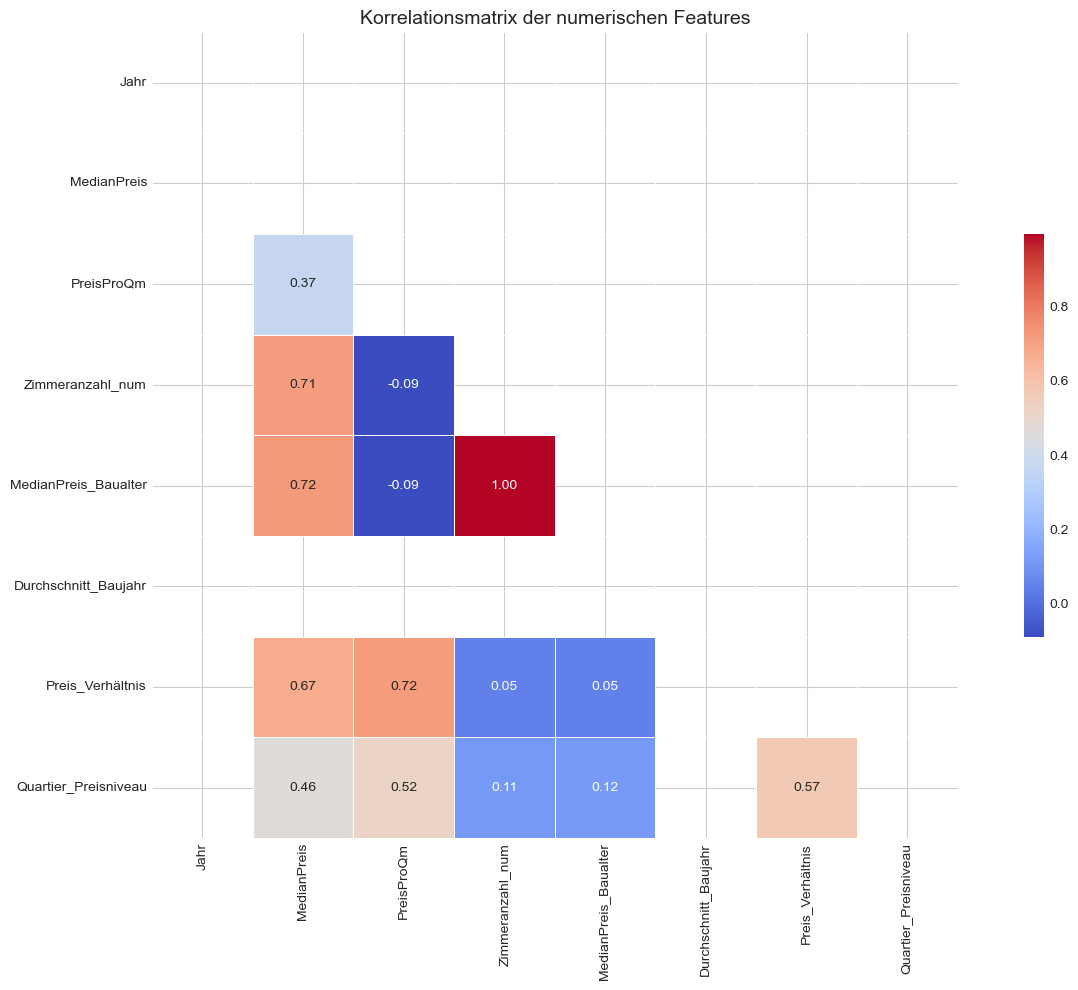

In [18]:
# Korrelationsmatrix berechnen und visualisieren
plt.figure(figsize=(14, 10))

# Nur numerische Spalten auswählen
numeric_columns = df_final.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df_final[numeric_columns].corr()

# Heatmap erstellen
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Korrelationsmatrix der numerischen Features', fontsize=14)
plt.tight_layout()
plt.show()

## 9. Daten speichern

Wir speichern die verarbeiteten Datensätze für die weitere Verwendung.

In [ ]:
# Verarbeitete Datensätze speichern
df_quartier_clean.to_csv('../data/processed/quartier_processed.csv', index=False)
df_baualter_clean.to_csv('../data/processed/baualter_processed.csv', index=False)
df_final.to_csv('../data/processed/modell_input_final.csv', index=False)

print("Datensätze wurden erfolgreich gespeichert!")

## 10. Zusammenfassung und nächste Schritte

**Zusammenfassung:**
- Die Immobilienpreise variieren stark zwischen den verschiedenen Quartieren in Zürich
- Die teuersten Quartiere sind: Seefeld, City, Hottingen
- Es gibt einen klaren positiven Zusammenhang zwischen Zimmeranzahl und Preis
- Neuere Gebäude sind tendenziell teurer als ältere
- Die Preise sind über die Jahre kontinuierlich gestiegen

**Nächste Schritte:**
1. Reisezeit-Daten generieren und integrieren
2. ML-Modelle (Random Forest, Gradient Boosting) trainieren
3. Modelle evaluieren und optimieren
4. Streamlit-App entwickeln mit interaktiven Karten
5. Video-Präsentation erstellen